In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
data = pd.read_csv("CarPrice_Assignment.csv", index_col=0)
data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [239]:
num_Cols = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 
            'horsepower', 'peakrpm', 'citympg', 'highwaympg']

cat_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
            'cylindernumber', 'fuelsystem']

In [240]:
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} unique values")


fueltype: 2 unique values
aspiration: 2 unique values
doornumber: 2 unique values
carbody: 5 unique values
drivewheel: 3 unique values
enginelocation: 2 unique values
enginetype: 7 unique values
cylindernumber: 7 unique values
fuelsystem: 8 unique values


In [241]:
low_variance_cols = [col for col in cat_cols if data[col].value_counts(normalize=True).iloc[0] > 0.95]
print("Low variance categorical columns:", low_variance_cols)

Low variance categorical columns: ['enginelocation']


In [242]:
data = data.drop(columns=low_variance_cols)
data = data.drop(columns=['CarName', 'symboling'])
data

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,2952,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,55.5,3049,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,3012,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [243]:
existing_cols = [item for item in cat_cols if item not in low_variance_cols]
data = pd.get_dummies(data, columns=existing_cols, drop_first=True)  # One-hot encode

correlations = data.drop(columns=num_Cols).corr()['price'].abs().sort_values(ascending=False)
low_correlation_cats = correlations[correlations < 0.05].index.tolist()

print("Categorical columns with low correlation to price:", low_correlation_cats)

Categorical columns with low correlation to price: ['carbody_wagon', 'enginetype_l', 'doornumber_two', 'fuelsystem_spfi', 'fuelsystem_4bbl', 'enginetype_ohcf', 'enginetype_rotor', 'cylindernumber_two', 'fuelsystem_mfi']


In [244]:
data = data.drop(low_correlation_cats, axis=1)
data

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,False,True,False
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,False,True,False
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,True,False,False,True,False,False,False,False,True,False
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,False,False,True,False,False,False,False,False,True,False
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,False,False,True,False,False,False,False,False,True,False
202,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,False,False,True,False,False,False,False,False,True,False
203,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,True,False,False,True,False,False,False,False,True,False


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 1 to 205
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    int64  
 10  peakrpm                205 non-null    int64  
 11  citympg                205 non-null    int64  
 12  highwaympg             205 non-null    int64  
 13  price                  205 non-null    float64
 14  fueltype_gas           205 non-null    bool   
 15  aspiration_

In [246]:
# train_data = data

train_data = data[0:180]
test_data = data[180:]

In [247]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 1 to 180
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              180 non-null    float64
 1   carlength              180 non-null    float64
 2   carwidth               180 non-null    float64
 3   carheight              180 non-null    float64
 4   curbweight             180 non-null    int64  
 5   enginesize             180 non-null    int64  
 6   boreratio              180 non-null    float64
 7   stroke                 180 non-null    float64
 8   compressionratio       180 non-null    float64
 9   horsepower             180 non-null    int64  
 10  peakrpm                180 non-null    int64  
 11  citympg                180 non-null    int64  
 12  highwaympg             180 non-null    int64  
 13  price                  180 non-null    float64
 14  fueltype_gas           180 non-null    bool   
 15  aspiration_

# Visualization

In [248]:
train_data.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,False,True,False
2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,True,False,False,False,False,False,True,False
3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,True,False,False,True,False,False,False,False,True,False
4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,False,False,True,False,False,False,False,False,True,False
5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,False,True,False,False,False,False,False,False,True,False


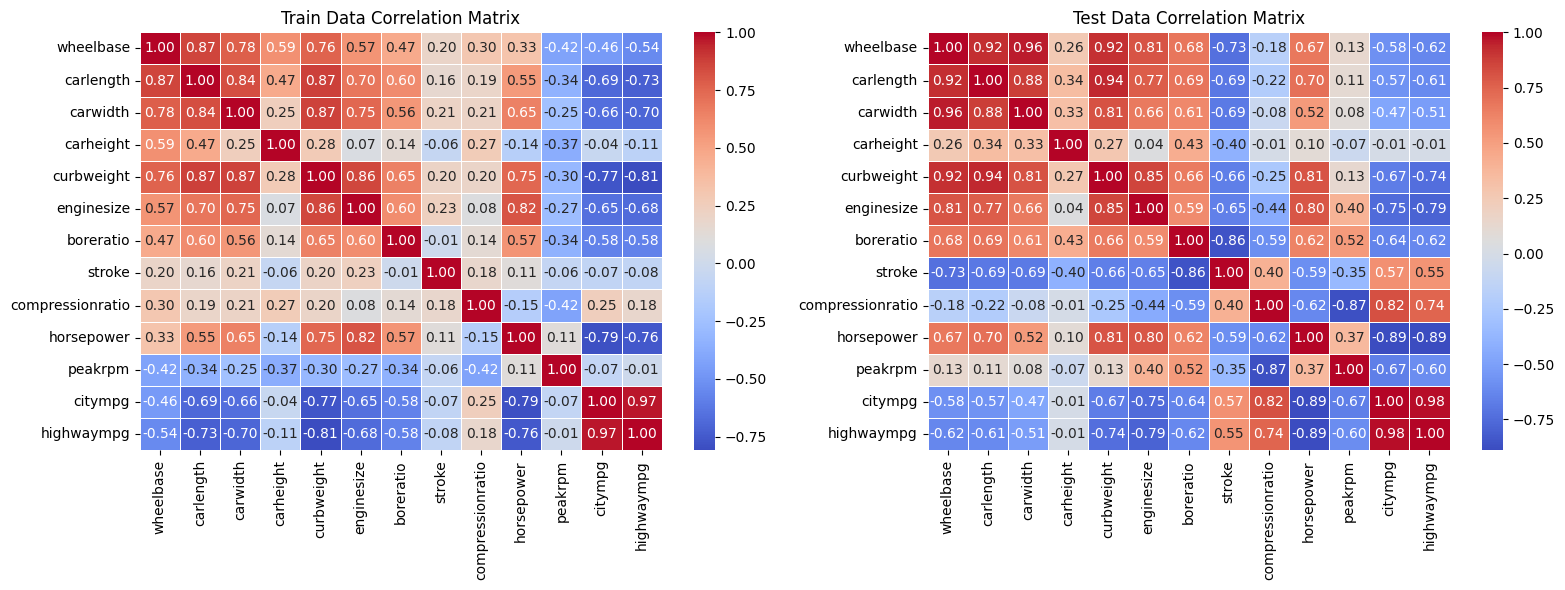

In [249]:
train_corr = train_data[num_Cols].corr()
test_corr = test_data[num_Cols].corr()

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Train Data Heatmap
sns.heatmap(train_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title("Train Data Correlation Matrix")

# Test Data Heatmap
sns.heatmap(test_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title("Test Data Correlation Matrix")

# Adjust layout
plt.tight_layout()
plt.show()

In [250]:
def preprocess(X):
    X = X.drop(['carlength', 'carwidth', 'curbweight', 'citympg', 'enginesize', 'boreratio', 'horsepower'], axis=1)
    return X

In [251]:
train_data = preprocess(train_data)
test_data = preprocess(test_data)

In [252]:
print(data.isna().nunique())

wheelbase                1
carlength                1
carwidth                 1
carheight                1
curbweight               1
enginesize               1
boreratio                1
stroke                   1
compressionratio         1
horsepower               1
peakrpm                  1
citympg                  1
highwaympg               1
price                    1
fueltype_gas             1
aspiration_turbo         1
carbody_hardtop          1
carbody_hatchback        1
carbody_sedan            1
drivewheel_fwd           1
drivewheel_rwd           1
enginetype_dohcv         1
enginetype_ohc           1
enginetype_ohcv          1
cylindernumber_five      1
cylindernumber_four      1
cylindernumber_six       1
cylindernumber_three     1
cylindernumber_twelve    1
fuelsystem_2bbl          1
fuelsystem_idi           1
fuelsystem_mpfi          1
fuelsystem_spdi          1
dtype: int64


In [253]:
train_data

,wheelbase,carheight,stroke,compressionratio,peakrpm,highwaympg,price,fueltype_gas,aspiration_turbo,carbody_hardtop,...,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,fuelsystem_spdi
car_ID,,,,,,,,,,,,,,,,,,,,,
1,88.6,48.8,2.68,9.0,5000,27,13495.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,88.6,48.8,2.68,9.0,5000,27,16500.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,94.5,52.4,3.47,9.0,5000,26,16500.0,True,False,False,...,True,False,False,True,False,False,False,False,True,False
4,99.8,54.3,3.40,10.0,5500,30,13950.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
5,99.4,54.3,3.40,8.0,5500,22,17450.0,True,False,False,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,102.4,53.9,3.54,8.7,4200,32,9988.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
177,102.4,54.9,3.54,8.7,4200,32,10898.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False
178,102.4,53.9,3.54,8.7,4200,32,11248.0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


# Training of the Model

In [254]:
X_train = train_data.drop(['price'], axis=1)
y_train = train_data['price'].values

X_test = test_data.drop(['price'], axis=1)
y_test = test_data['price'].values

The following normalizes the inputs of the model between 0 and 1

In [255]:
def zscore_normalize(X, mu=None, sigma=None):
    if mu is None:
        mu = np.mean(X, axis=0)
    if sigma is None:
        sigma = np.std(X, axis=0)
    X_norm = (X - mu) / (sigma + 1e-8)
    return X_norm, mu, sigma

In [256]:
# Normalize training data
X_train, mu, sigma = zscore_normalize(X_train)

In [257]:
# Normalize test data using training parameters
X_test, _, _ = zscore_normalize(X_test, mu, sigma)

In [258]:
print(X_test.shape)
print(X_train.shape)

(25, 25)
(180, 25)


This code initializes values for a linear regression model

In [259]:
#seed helps in generating the same random values each time ensuring reproducibility in code
np.random.seed(42)   
weights = np.random.rand(X_train.shape[1]) # assigning weights to every input helps you find how much each input contributes to the ouptut
bias = 0.0 # gets updated during the training
learning_rate = 0.01 # determines how much weights change during training
num_iterations = 170 #specifies the number of iterations
reg_lambda= 500
m = len(y_train) # stores the number of training examples. Training example is a single data point from the training dataset which is used to teach the model 

Gradient Descent code to train the linear regression model

In [260]:
# Gradient Descent with Loss Tracking
loss_history = []

for i in range(num_iterations): # runs for a pre-defined "num_iterations" times
    y_pred = np.dot(X_train, weights) + bias # calculates the predicted output for each training example
    error = y_pred - y_train # calculates the difference between the predicted values and the actual target

    mse_loss = np.mean(error ** 2)
    loss_history.append(mse_loss)
    
    weights_gradient = (2/m) * np.dot(X_train.T, error) +  (reg_lambda / m) * weights  # gradient tells us the direction and magnitude to adjust each weight to reduce the error.
    bias_gradient = (2/m) * np.sum(error) # tells how much to change the bais to improve predictions

    weights -= learning_rate * weights_gradient 
    bias -= learning_rate * bias_gradient   

    if i % 10 == 0:
        print(f"Iteration {i}: Loss = {mse_loss}, Weights Gradient = {np.linalg.norm(weights_gradient)}, Bias Gradient = {bias_gradient}")

y_train_pred = np.dot(X_train, weights) + bias
y_test_pred = np.dot(X_test, weights) + bias

Iteration 0: Loss = 242719332.2400651, Weights Gradient = 31512.255514869135, Bias Gradient = -26340.67407777778
Iteration 10: Loss = 144067555.21960062, Weights Gradient = 8186.064650864476, Bias Gradient = -21522.248504039937
Iteration 20: Loss = 100147003.21657372, Weights Gradient = 2544.270295330533, Bias Gradient = -17585.243995727218
Iteration 30: Loss = 73180634.63413695, Weights Gradient = 1145.589188678343, Bias Gradient = -14368.424671391218
Iteration 40: Loss = 55585630.18599969, Weights Gradient = 675.3265086387161, Bias Gradient = -11740.049076805897
Iteration 50: Loss = 43934887.7324047, Weights Gradient = 435.4722244063578, Bias Gradient = -9592.474852183348
Iteration 60: Loss = 36182651.080325596, Weights Gradient = 289.8132448350197, Bias Gradient = -7837.750352471655
Iteration 70: Loss = 31014773.048912376, Weights Gradient = 196.55589135549207, Bias Gradient = -6404.012680177872
Iteration 80: Loss = 27566968.870671835, Weights Gradient = 135.3090484527645, Bias Grad

In [261]:
print("Actual prices:", y_test[:10])
print("Predicted prices:", y_test_pred[:10])

Actual prices: [15690. 15750.  7775.  7975.  7995.  8195.  8495.  9495.  9995. 11595.]
Predicted prices: [22216.29875934 21808.30659321  9371.16790746 11284.16890394
  9371.16790746 11284.16890394 11284.16890394 10391.3257717
 11556.15252772 11163.54192918]


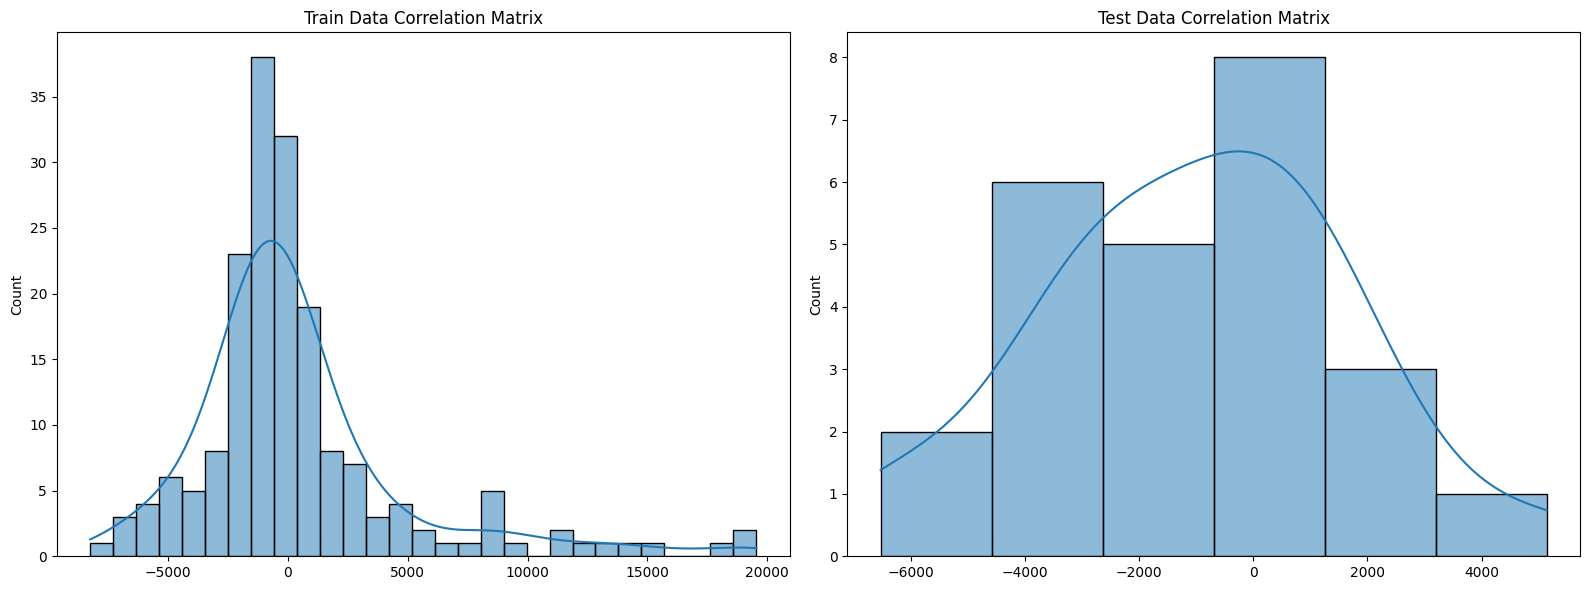

In [262]:
# Calculate residuals
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

# Set up the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Train Data Heatmap
sns.histplot(residuals_train, kde=True, ax=axes[0])
axes[0].set_title("Train Data Correlation Matrix")

# Test Data Heatmap
sns.histplot(residuals_test, kde=True, ax=axes[1])
axes[1].set_title("Test Data Correlation Matrix")

# Adjust layout
plt.tight_layout()
plt.show()

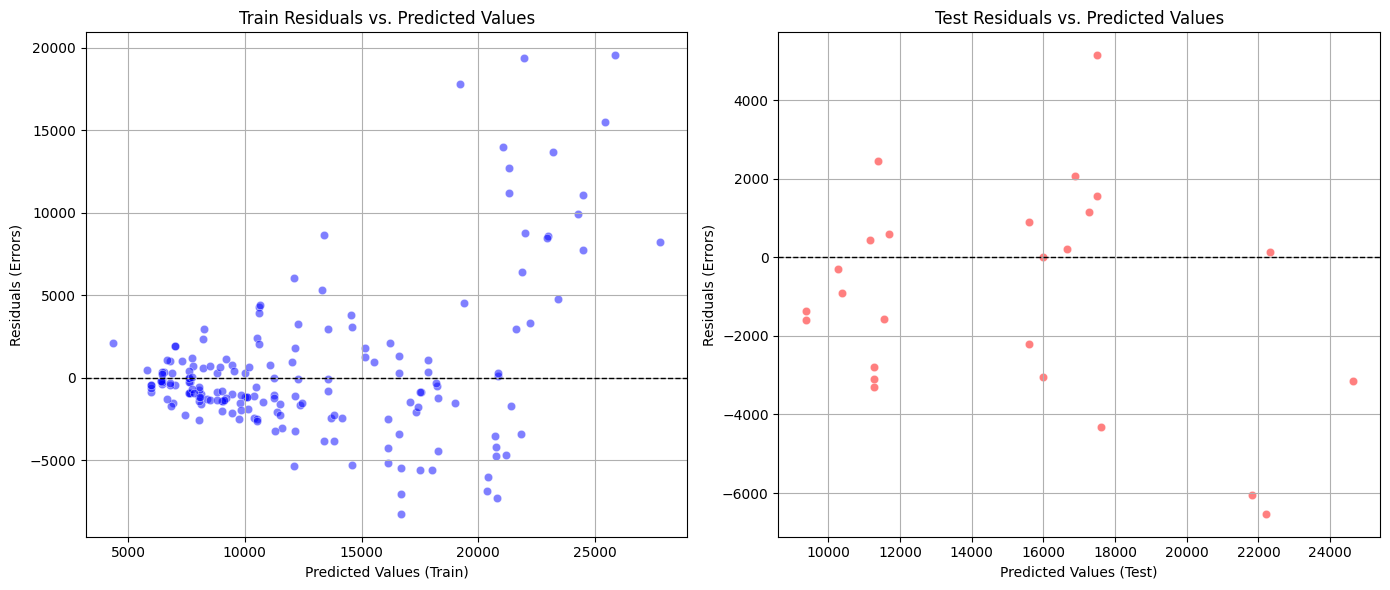

In [263]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Two side-by-side plots

# Train Residual Plot
sns.scatterplot(x=y_train_pred, y=residuals_train, alpha=0.5, color="blue", ax=axes[0])
axes[0].axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero Residual Line
axes[0].set_xlabel("Predicted Values (Train)")
axes[0].set_ylabel("Residuals (Errors)")
axes[0].set_title("Train Residuals vs. Predicted Values")
axes[0].grid(True)

# Test Residual Plot
sns.scatterplot(x=y_test_pred, y=residuals_test, alpha=0.5, color="red", ax=axes[1])
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)  # Zero Residual Line
axes[1].set_xlabel("Predicted Values (Test)")
axes[1].set_ylabel("Residuals (Errors)")
axes[1].set_title("Test Residuals vs. Predicted Values")
axes[1].grid(True)

plt.tight_layout()  # Adjust layout
plt.show()

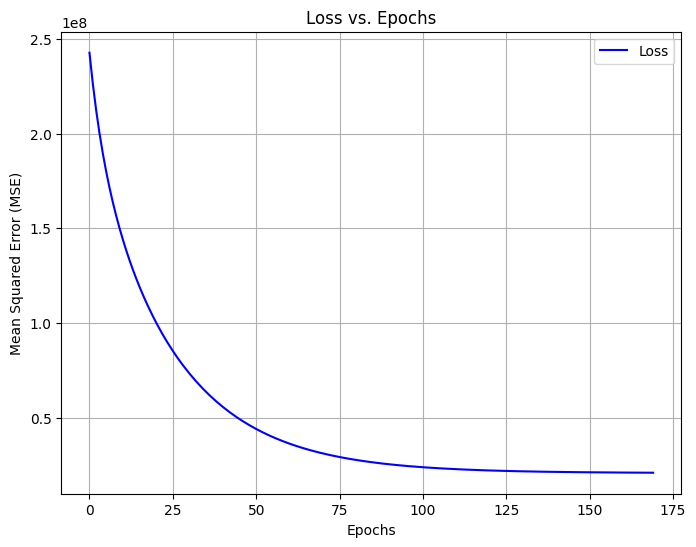

In [264]:
# Plotting the Loss vs. Epochs
plt.figure(figsize=(8, 6))
plt.plot(range(num_iterations), loss_history, color="b", label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss vs. Epochs")
plt.legend()
plt.grid(True)
plt.show()

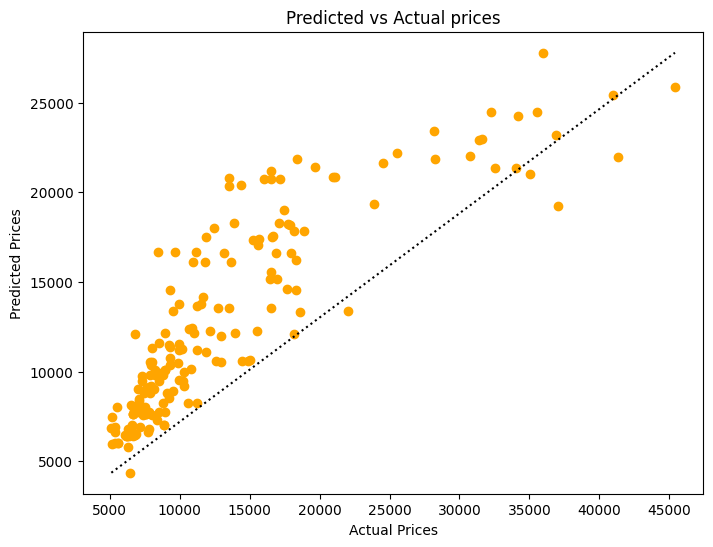

In [265]:
plt.figure(figsize=(8, 6))

# Scatter plot of the actual price vs the pedicted price
plt.scatter(y_train, y_train_pred, color = 'orange')

# Line plot of the best-fit line (model predictions)
plt.plot([min(y_train), max(y_train)], [min(y_train_pred), max(y_train_pred)], 'k:')

# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual prices')
plt.show()

In [266]:
total_train = np.sum((y_train - y_train.mean()) ** 2)
residual_train = np.sum((y_train - y_train_pred) ** 2)
r2_train = 1-(residual_train / total_train)

residual_test = np.sum((y_test - y_test_pred) ** 2)
total_test = np.sum((y_test - y_test.mean()) ** 2)
r2_test = 1-(residual_test / total_test)

In [267]:
print("R-squared (R²) for Train set:", r2_train)
print("R-squared (R²) for Test set:", r2_test)

R-squared (R²) for Train set: 0.6993654891716761
R-squared (R²) for Test set: 0.625943240955925


In [268]:
mae = np.mean(np.abs(y_test - y_test_pred))
rmse = np.sqrt(np.mean((y_test - y_test_pred) ** 2))
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 2193.710610303062
Root Mean Squared Error (RMSE): 2827.1226940676884
